In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/home/shailendra/Downloads/Advertising.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [42]:
df.shape

(200, 4)

In [15]:
import matplotlib.pyplot as plt

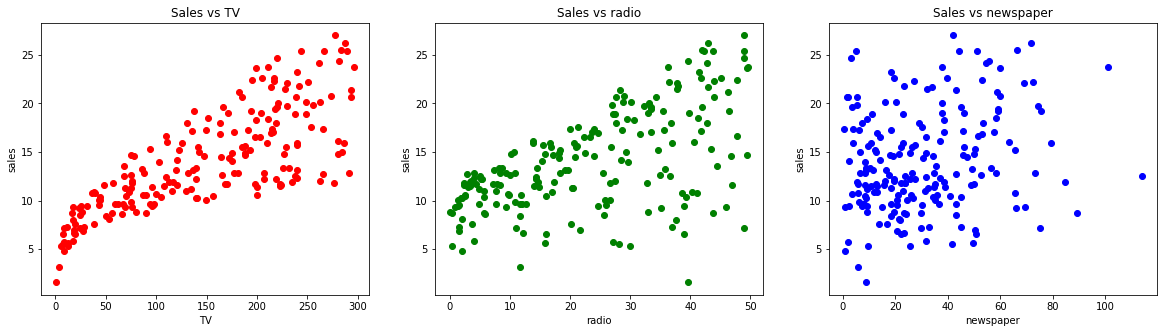

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
color=['red', 'green', 'blue']
for idx, col in enumerate(df.columns[:-1]):
    ax[idx].scatter(df[col], df['sales'], color = color[idx])
    ax[idx].set_title('Sales vs {}'.format(col))
    ax[idx].set_xlabel('{}'.format(col))
    ax[idx].set_ylabel('sales')
plt.show()

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [178]:
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1, 1)

lin_reg = LinearRegression(normalize =True)

lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [179]:
lin_reg.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [180]:
lin_reg.intercept_

array([2.93888937])

In [177]:
y_pred = lin_reg.predict(X)

In [170]:
from sklearn.metrics import mean_squared_error

In [77]:
np.sqrt(mean_squared_error(y, y_pred))

1.66857014072257

In [100]:
r2_score = cross_val_score(lin_reg, X, y, scoring='r2', cv=5)

In [101]:
np.mean(r2_score)

0.8871063495438435

In [113]:
lasso = Lasso()

lasso.fit(X, y)
r2_score = cross_val_score(lasso, X, y, scoring='r2', cv=4)

In [114]:
r2_score.mean()

0.8906008995197323

In [115]:
ridge = Ridge()

ridge.fit(X, y)
r2_score = cross_val_score(ridge, X, y, scoring='r2', cv=5)

In [117]:
r2_score

array([0.87865192, 0.91763166, 0.92933068, 0.81444503, 0.8954746 ])

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [185]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]
parameters = {'alpha' : alpha}
ridge = Ridge(normalize=True)
ridge.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [186]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_log_error', cv=5)

In [187]:
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [188]:
ridge_regressor.best_params_

{'alpha': 0.1}

In [189]:
ridge_regressor.best_score_

-0.03137708137057656

In [196]:
lasso = Lasso()
lasso.fit(X, y)
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_log_error', cv=5)

lasso_regressor.fit(X, y)

/home/shailendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/shailendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/shailendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/shailendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [197]:
lasso_regressor.best_params_

{'alpha': 10}

In [198]:
lasso.coef_

array([0.04566142, 0.1834644 , 0.        ])

In [199]:
ridge.coef_

array([[0.02322618, 0.09408785, 0.01339689]])

In [200]:
import seaborn as sns

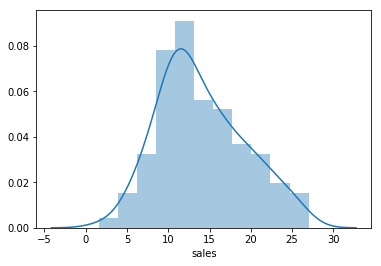

In [203]:
sns.distplot(df['sales'])
plt.show()

In [205]:
df.shape

(200, 4)

In [207]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [209]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
dataframe = pd.read_csv('../data/clean_train.csv',index_col=0)

In [211]:
%matplotlib inline

In [223]:
df = sns.load_dataset('tips')

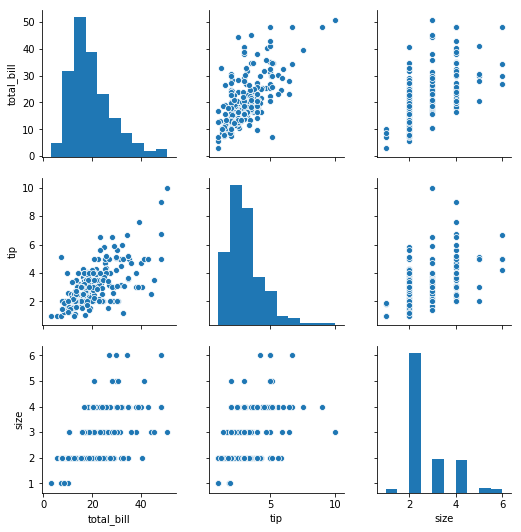

In [224]:
sns.pairplot(df)

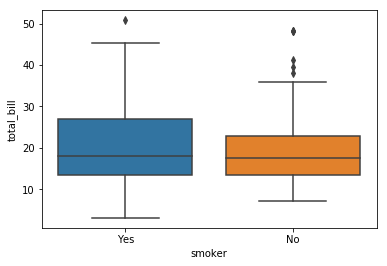

In [226]:
sns.boxplot('smoker', 'total_bill', data=df)

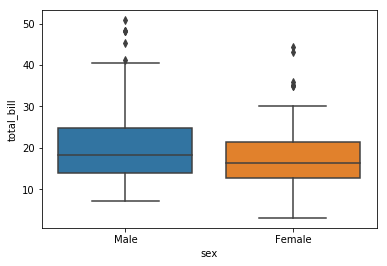

In [227]:
sns.boxplot('sex', 'total_bill', data=df)

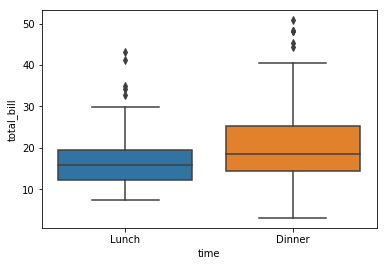

In [228]:
sns.boxplot('time', 'total_bill', data=df)

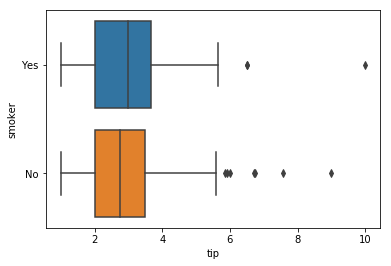

In [229]:
sns.boxplot('tip', 'smoker', data=df)

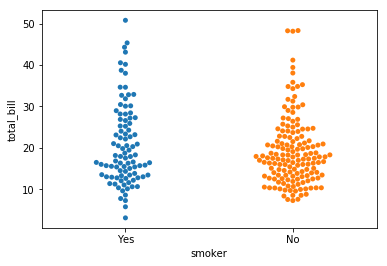

In [231]:
sns.swarmplot('smoker', 'total_bill', data=df)

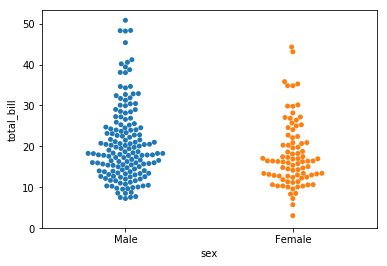

In [232]:
sns.swarmplot('sex', 'total_bill', data=df)

In [237]:
crosstab = pd.crosstab(index=df["day"], columns=df["time"])

crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

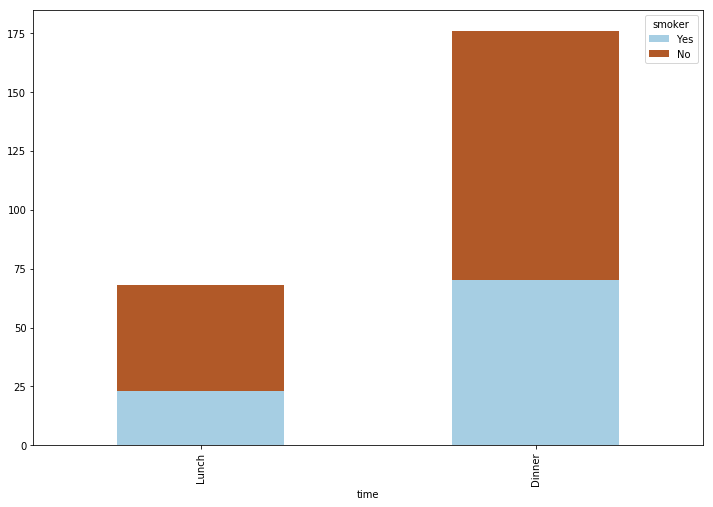

In [239]:
crosstab = pd.crosstab(index=df["time"], columns=df["smoker"])

crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

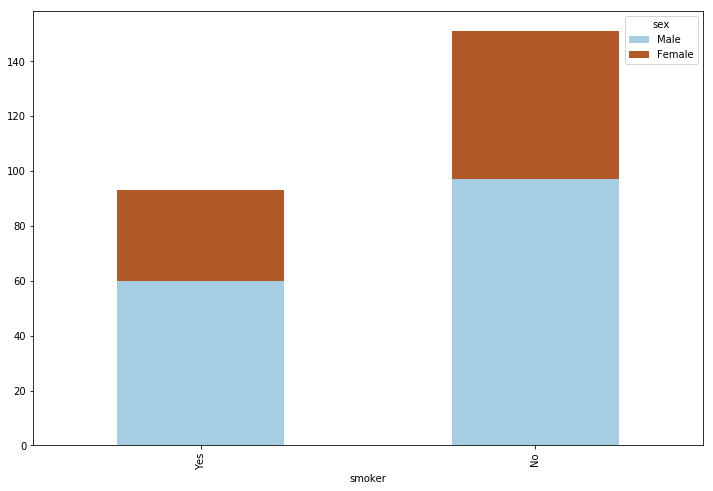

In [241]:
crosstab = pd.crosstab(index=df["smoker"], columns=df["sex"])

crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [222]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/shailendra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


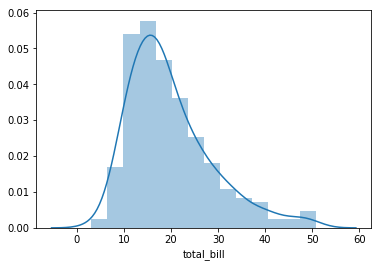

In [215]:
sns.distplot(df['total_bill'])

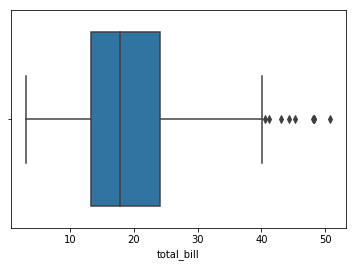

In [217]:
sns.boxplot(df.total_bill)

/home/shailendra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


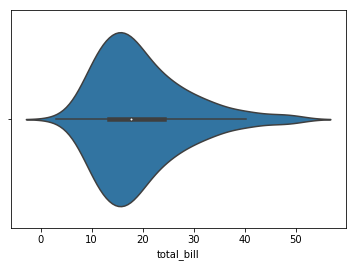

In [221]:
ax = sns.violinplot(x=df.total_bill, inner='box')

In [ ]:
sns.distplot(df[df.day == 'Fri'])